<a href="https://colab.research.google.com/github/N-django/data-analysis-vehicle-Insuranceclaims/blob/main/Premium_Pricing_Model(CF_%26_CS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting and Importing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
df= pd.read_excel('/content/drive/MyDrive/Motor Private Dataset.xlsx')
df.columns

Index(['CMB_CLAIM_NO', 'POLICY_NO', 'EF', 'ET', 'LOSS_DATE', 'REPORT DATE',
       'Vehicle_ID', 'YOM', 'AGE_CATEGORY', 'CAR_AGE', ' COLORS',
       'CUBIC_CAPACITY', 'CARRY_CAPACITY', 'BODY TYPE', 'REG_Name',
       'VEHICLE MAKE', 'VEHICLE MODELS', 'GROSS_PAID'],
      dtype='object')

### Data Preprocessing

In [17]:
df.head()
blank_columns=df.isna().sum()
blank_columns

,0
CMB_CLAIM_NO,0
POLICY_NO,0
EF,0
ET,0
LOSS_DATE,0
REPORT DATE,0
Vehicle_ID,0
YOM,5439
AGE_CATEGORY,0
CAR_AGE,5439


Imputation of Missing Values

In [6]:
median_yom = df['YOM'].median()
df['YOM']= df['YOM'].fillna(median_yom)

mean_car_age = df['CAR_AGE'].mean()
mean_cubic_capacity = df['CUBIC_CAPACITY'].mean()
mean_carry_capacity = df['CARRY_CAPACITY'].mean()

df['CAR_AGE'] = df['CAR_AGE'].fillna(mean_car_age)
df['CUBIC_CAPACITY'] = df['CUBIC_CAPACITY'].fillna(mean_cubic_capacity)
df['CARRY_CAPACITY'] = df['CARRY_CAPACITY'].fillna(mean_carry_capacity)
df['REG_Name']=df['REG_Name'].fillna('UNKNOWN')
df['GROSS_PAID']=df['GROSS_PAID'].fillna(0)
#  Get Mode for Categorical variables.
columns_to_get_mode = [' COLORS', 'BODY TYPE', 'VEHICLE MAKE', 'VEHICLE MODELS']
for column in columns_to_get_mode:
    mode_value = df[column].mode().iloc[0]
    df[column] = df[column].replace("UNKOWN",mode_value)

Blank_columns = df.isna().sum()

df['Claim_Frequency'] = df.groupby('Vehicle_ID')['CMB_CLAIM_NO'].transform('count')
print(f"Total number of missing values: {Blank_columns}")
print(f"df[columns_to_get_mode].head()")

Total number of missing values: CMB_CLAIM_NO      0
POLICY_NO         0
EF                0
ET                0
LOSS_DATE         0
REPORT DATE       0
Vehicle_ID        0
YOM               0
AGE_CATEGORY      0
CAR_AGE           0
 COLORS           0
CUBIC_CAPACITY    0
CARRY_CAPACITY    0
BODY TYPE         0
REG_Name          0
VEHICLE MAKE      0
VEHICLE MODELS    0
GROSS_PAID        0
dtype: int64
df[columns_to_get_mode].head()


In [7]:
print(df[columns_to_get_mode].head())
df.rename(columns={' COLORS': 'COLOR'}, inplace=True)

   COLORS      BODY TYPE VEHICLE MAKE   VEHICLE MODELS
0   BLACK  STATION WAGON       TOYOTA   TOYOTA HARRIER
1   WHITE  STATION WAGON       TOYOTA      TOYOTA RAV4
2  SILVER  STATION WAGON       SUBARU  SUBARU FORESTER
3  SILVER          SEDAN      UNKNOWN      SALOON AUTO
4   BLACK  STATION WAGON       NISSAN   NISSAN X-TRAIL


Calculating Claim Frequency

In [8]:
df['Policy Years'] = df['EF'].str.extract(r'(\d{4})').astype(float)

# Group by Vehicle_ID and count the number of unique Policy Years
policy_period = df.groupby('Vehicle_ID')['Policy Years'].nunique().reset_index()
policy_period.rename(columns={'Policy Years': 'Policy Period'}, inplace=True)

# Merge back to the original dataframe
df = df.merge(policy_period, on='Vehicle_ID', how='left')

# Calculate Claim Frequency (CF)
df['CF'] = df['Claim_Frequency'] / df['Policy Period']
df

# # Export the modified dataframe to an Excel file
# output_file = '/content/Processed_Policies.xlsx'
# df.to_excel(output_file, index=False)

# from google.colab import files
# files.download(output_file)

,CMB_CLAIM_NO,POLICY_NO,EF,ET,LOSS_DATE,REPORT DATE,Vehicle_ID,YOM,AGE_CATEGORY,CAR_AGE,...,CARRY_CAPACITY,BODY TYPE,REG_Name,VEHICLE MAKE,VEHICLE MODELS,GROSS_PAID,Claim_Frequency,Policy Years,Policy Period,CF
0,C/10/700/043075,10/700/0030439,06/09/2023,06/08/2024,2024-05-13,2024-05-14 00:00:00,KCY 676R,2014.0,8+ Years,10.000000,...,5.000000,STATION WAGON,TOYOTA HARRIER HYBDRID,TOYOTA,TOYOTA HARRIER,0.0,1,2023.0,1,1.0
1,C/12/700/041177,12/700/0071745,03/01/2023,02/29/2024,2024-01-26,2024-02-15 00:00:00,KCM 432W,2011.0,8+ Years,13.000000,...,5.000000,STATION WAGON,TOYOTA RAV4,TOYOTA,TOYOTA RAV4,0.0,1,2023.0,1,1.0
2,C/40/700/037888,AE700/0065804/000/00,03/03/2023,01/24/2024,2023-08-30,2023-09-01 00:00:00,KDL 192F,2017.0,4-7 Years,7.000000,...,5.000000,STATION WAGON,SUBARU FORESTER,SUBARU,SUBARU FORESTER,0.0,1,2023.0,1,1.0
3,C/10/700/036490,10/700/0101357,01/01/2023,12/31/2023,2023-04-14,2023-06-19 00:00:00,KBZ 107K,2007.0,8+ Years,17.000000,...,5.000000,SEDAN,SALOON AUTO,UNKNOWN,SALOON AUTO,0.0,2,2023.0,2,1.0
4,C/15/700/033788,AI700/0060894/000/00,09/21/2022,07/20/2023,2023-01-23,2023-01-30 00:00:00,KCH 319U,2009.0,8+ Years,15.000000,...,5.000000,STATION WAGON,NISSAN XTRAIL,NISSAN,NISSAN X-TRAIL,0.0,3,2022.0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42432,10/070/2005/1610,P/10/2005/0710/3668,05/08/2005,12/31/2005,2005-11-30,2005-11-30 00:00:00,KAJ 774B,2004.0,8+ Years,27.000000,...,5.000000,SEDAN,MITSUBISHI LANCER,MITSUBISHI,MITSUBISHI LANCER,0.0,1,2005.0,1,1.0
42433,ZAA700-/002188,ZAA700/019105/000/00,01/01/2005,12/31/2005,2005-10-23,2005-10-23 00:00:00,KAE 042B,2004.0,8+ Years,29.000000,...,5.000000,STATION WAGON,PEUGEOT 405 GR,GEO,PEUGEOT 405,0.0,2,2005.0,1,2.0
42434,ZAA700/003507,ZAA700/020286/000/00,11/09/2004,11/08/2005,2005-07-05,2005-07-07 10:36:00,KAR 387T AA,2004.0,8+ Years,29.000000,...,5.000000,STATION WAGON,TOYOTA,TOYOTA,TOYOTA,0.0,1,2004.0,1,1.0
42435,10/070/2005/1247,P/10/2005/0710/3605,04/27/2005,04/26/2006,2005-06-02,2005-06-02 00:00:00,KAD 261S,2004.0,8+ Years,36.000000,...,5.000000,SEDAN,NISSAN,NISSAN,NISSAN,0.0,1,2005.0,1,1.0


Calculating Claim Severity

In [9]:
df_grouped = df.groupby('Vehicle_ID').agg({'GROSS_PAID': 'sum'}).reset_index()
df_grouped.rename(columns={'GROSS_PAID': 'Total_Claim_Amount'}, inplace=True)
df = pd.merge(df, df_grouped, on='Vehicle_ID', how='left')
df['Severity']=df['Total_Claim_Amount']/df['Claim_Frequency']
df.columns


Index(['CMB_CLAIM_NO', 'POLICY_NO', 'EF', 'ET', 'LOSS_DATE', 'REPORT DATE',
       'Vehicle_ID', 'YOM', 'AGE_CATEGORY', 'CAR_AGE', 'COLOR',
       'CUBIC_CAPACITY', 'CARRY_CAPACITY', 'BODY TYPE', 'REG_Name',
       'VEHICLE MAKE', 'VEHICLE MODELS', 'GROSS_PAID', 'Claim_Frequency',
       'Policy Years', 'Policy Period', 'CF', 'Total_Claim_Amount',
       'Severity'],
      dtype='object')

Variance of CF and CS

In [10]:
print("Mean Claim Frequency",df['CF'].mean())
print( "Variance Claim Frequency",df['CF'].var())

print("&")

print("Mean Severity",df['Severity'].mean())
print( "Variance Severity",df['Severity'].var())

Mean Claim Frequency 1.20495530068662
Variance Claim Frequency 0.178888507230115
&
Mean Severity 199704.0339148088
Variance Severity 152412596022.94797


In [11]:
selected_columns=['CAR_AGE', 'COLOR','CUBIC_CAPACITY', 'CARRY_CAPACITY', 'BODY TYPE','VEHICLE MAKE', 'VEHICLE MODELS', 'CF','Severity']
Feature_df=df[selected_columns]

## Correlation Analysis

> Add blockquote



In [12]:
Feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42437 entries, 0 to 42436
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CAR_AGE         42437 non-null  float64
 1   COLOR           42437 non-null  object 
 2   CUBIC_CAPACITY  42437 non-null  float64
 3   CARRY_CAPACITY  42437 non-null  float64
 4   BODY TYPE       42437 non-null  object 
 5   VEHICLE MAKE    42437 non-null  object 
 6   VEHICLE MODELS  42437 non-null  object 
 7   CF              42437 non-null  float64
 8   Severity        42437 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.9+ MB


In [34]:
Feature_df.duplicated().sum()

8351

In [13]:
Feature_df.describe(include='all')

,CAR_AGE,COLOR,CUBIC_CAPACITY,CARRY_CAPACITY,BODY TYPE,VEHICLE MAKE,VEHICLE MODELS,CF,Severity
count,42437.000000,42437,42437.000000,42437.000000,42437,42437,42437,42437.000000,4.243700e+04
unique,NaN,16,NaN,NaN,12,41,574,NaN,NaN
top,NaN,UNKNOWN,NaN,NaN,STATION WAGON,TOYOTA,TOYOTA,NaN,NaN
freq,NaN,15576,NaN,NaN,29262,24326,2889,NaN,NaN
mean,13.364641,NaN,1858.067958,5.129212,NaN,NaN,NaN,1.204955,1.997040e+05
std,3.543801,NaN,578.347656,0.610167,NaN,NaN,NaN,0.422952,3.904006e+05
min,0.000000,NaN,650.000000,1.000000,NaN,NaN,NaN,1.000000,0.000000e+00
25%,11.000000,NaN,1490.000000,5.000000,NaN,NaN,NaN,1.000000,2.320000e+04
50%,13.364641,NaN,1790.000000,5.000000,NaN,NaN,NaN,1.000000,9.574000e+04
75%,15.000000,NaN,1990.000000,5.000000,NaN,NaN,NaN,1.000000,2.200495e+05


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

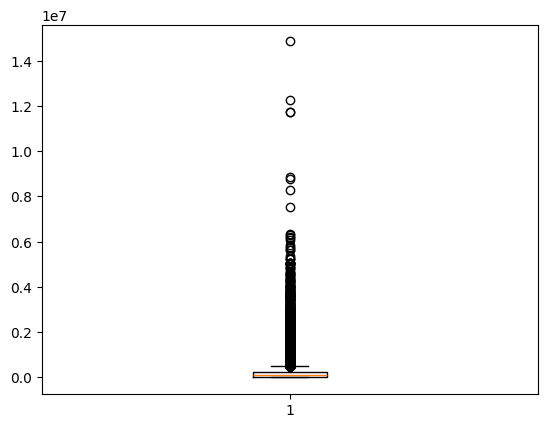

In [14]:
# Export Feature_df to excel to Check on Severity Values, Why we have extreme values and Zeros.
#  Plot Box and Whisker Chart to identify Possible outliers in the column

import matplotlib.pyplot as plt
from google.colab import files

Feature_df.to_excel('Feature_df.xlsx', index=False)
files.download('Feature_df.xlsx')
plt.boxplot(Feature_df['Severity'])
plt.show()

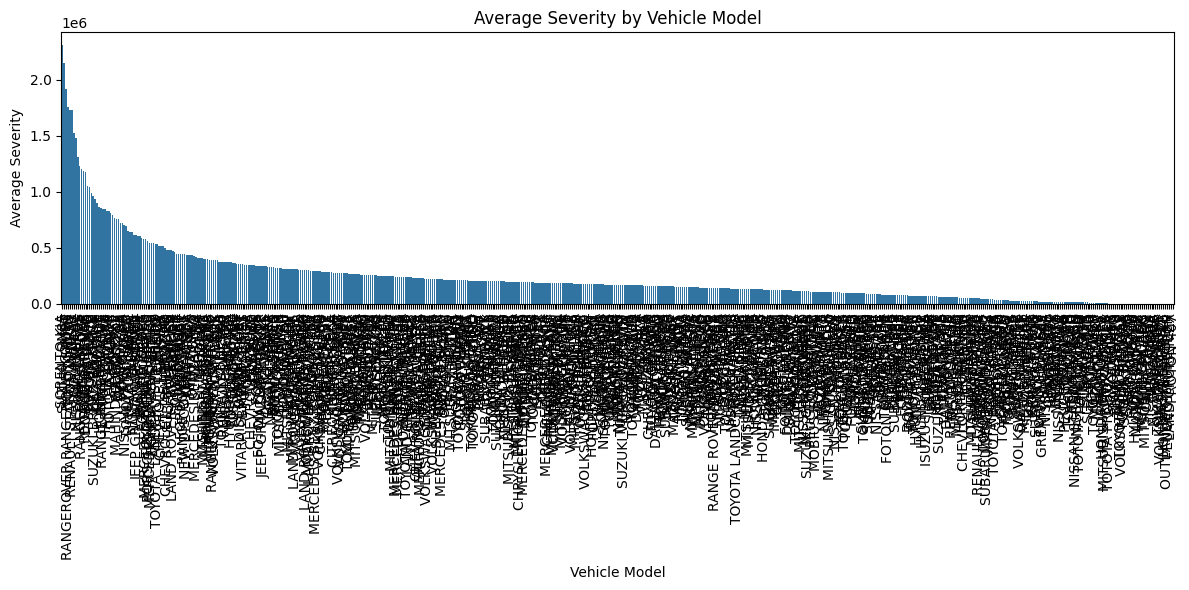

In [15]:
#  Plot a Bar graph to show the distribution of Vehucle models and claim Severity
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by vehicle model and calculate the average severity
model_severity = Feature_df.groupby('VEHICLE MODELS')['Severity'].mean().reset_index()

# Sort the data by severity in descending order
model_severity = model_severity.sort_values(by=['Severity'], ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='VEHICLE MODELS', y='Severity', data=model_severity)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Average Severity by Vehicle Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Severity')
plt.tight_layout()
plt.show()


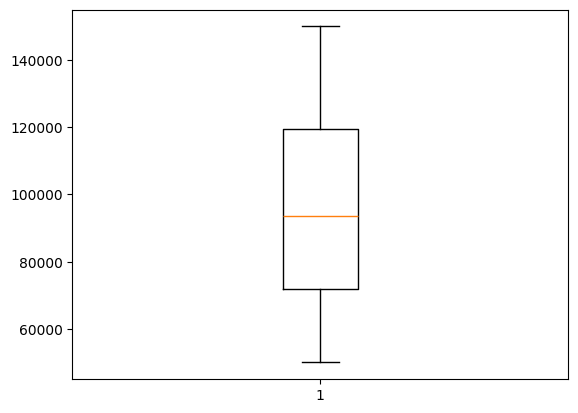

In [16]:
# Filter records in Severity column where value = 0. These were Outstanding Claims and where severity is greater than 2M
Filtered_df=Feature_df[(Feature_df['Severity']>50000) & (Feature_df['Severity']<150000)]

# Replot the Box plot
plt.boxplot(Filtered_df['Severity'])
plt.show()


In [17]:
# Get total count of records in the Filtered Dataset.
# Feature_df.count()
Filtered_df.describe(include='all')

,CAR_AGE,COLOR,CUBIC_CAPACITY,CARRY_CAPACITY,BODY TYPE,VEHICLE MAKE,VEHICLE MODELS,CF,Severity
count,12151.000000,12151,12151.000000,12151.000000,12151,12151,12151,12151.000000,12151.000000
unique,NaN,16,NaN,NaN,10,34,345,NaN,NaN
top,NaN,UNKNOWN,NaN,NaN,STATION WAGON,TOYOTA,TOYOTA FIELDER,NaN,NaN
freq,NaN,4530,NaN,NaN,8380,6887,873,NaN,NaN
mean,13.520267,NaN,1782.932189,5.105318,NaN,NaN,NaN,1.281139,96006.806058
std,3.282867,NaN,502.349599,0.546247,NaN,NaN,NaN,0.479621,28284.475392
min,1.000000,NaN,650.000000,1.000000,NaN,NaN,NaN,1.000000,50010.000000
25%,12.000000,NaN,1490.000000,5.000000,NaN,NaN,NaN,1.000000,71913.833333
50%,13.364641,NaN,1790.000000,5.000000,NaN,NaN,NaN,1.000000,93700.000000
75%,15.000000,NaN,1990.000000,5.000000,NaN,NaN,NaN,1.500000,119459.133333


In [18]:
#  Target Encode Categorical variables
!pip install category_encoders
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
Filtered_df[['COLOR','BODY TYPE','VEHICLE MAKE', 'VEHICLE MODELS']] = target_encoder.fit_transform(Filtered_df[['COLOR','BODY TYPE','VEHICLE MAKE', 'VEHICLE MODELS']], Filtered_df['Severity'])
Filtered_df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


<ipython-input-18-c7202fe8c40f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_df[['COLOR','BODY TYPE','VEHICLE MAKE', 'VEHICLE MODELS']] = target_encoder.fit_transform(Filtered_df[['COLOR','BODY TYPE','VEHICLE MAKE', 'VEHICLE MODELS']], Filtered_df['Severity'])


,CAR_AGE,COLOR,CUBIC_CAPACITY,CARRY_CAPACITY,BODY TYPE,VEHICLE MAKE,VEHICLE MODELS,CF,Severity
5,13.0,97566.265818,1790.0,5.0,94694.683825,95943.753238,91557.193301,3.0,76840.0
10,13.0,95117.350304,1490.0,5.0,94694.683825,95943.753238,91557.193301,1.0,63590.0
22,20.0,95117.350304,1490.0,5.0,96284.003719,95943.753238,93736.677177,1.0,111031.0
23,17.0,97566.265818,1990.0,5.0,96284.003719,95251.287049,95762.357411,1.0,72621.8
30,15.0,97566.265818,1760.0,5.0,94694.683825,95251.287049,95762.357411,1.0,114269.0


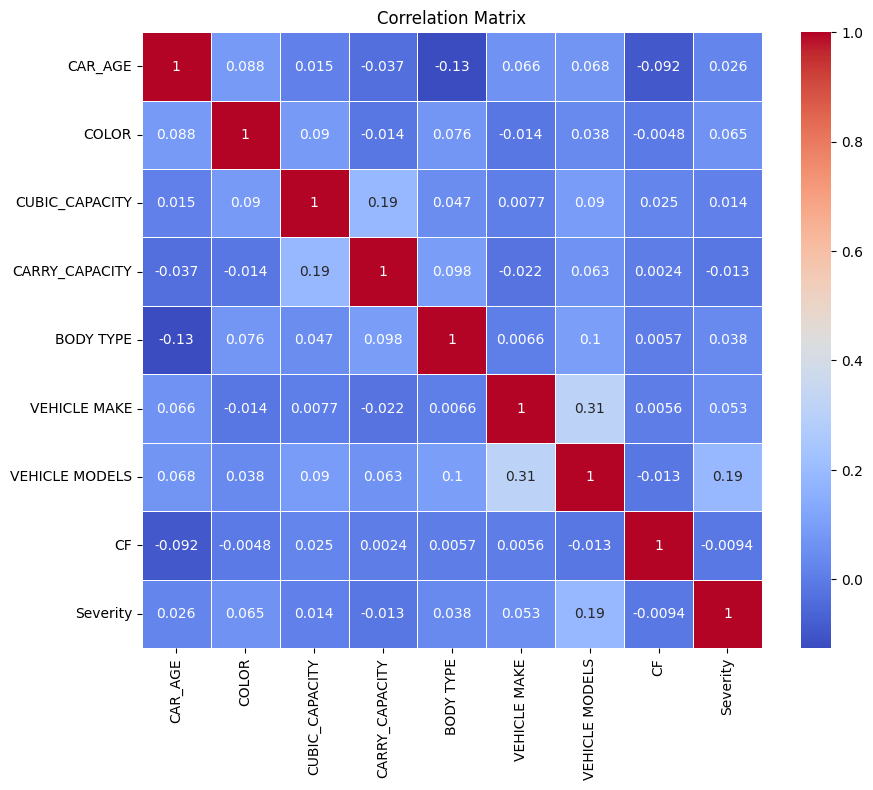

In [20]:

correlation_matrix = Filtered_df.corr()

# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Multicolinearity Check(VIF)

In [75]:
# Check for Multicolinearity in the Features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(Filtered_df.drop(['Severity','CF'], axis=1))
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Feature           VIF
0           const  17896.897373
1         CAR_AGE      1.035647
2           COLOR      1.025532
3  CUBIC_CAPACITY      1.052157
4  CARRY_CAPACITY      1.050317
5       BODY TYPE      1.045295
6    VEHICLE MAKE      1.112017
7  VEHICLE MODELS      1.135566


In [76]:
print("Mean Severity",Filtered_df['Severity'].mean())
print( "Variance Severity",Filtered_df['Severity'].var())

Mean Severity 96006.80605760844
Variance Severity 800011548.2034185


GLM for Claim Severity

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np


y = Filtered_df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

# Add a constant to X_train and X_test for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

gamma_model = sm.GLM(y_train, X_train_sm, family=sm.families.Gamma(link=sm.families.links.log())
                     )
gamma_results = gamma_model.fit()
y_pred_gamma = gamma_results.predict(X_test_sm)
y_pred_original_scale = np.exp(y_pred_gamma)  # Exponentiate predictions to bring back to the original scale

# Evaluate the Gamma GLM model
mae = mean_absolute_error(y_test, y_pred_gamma)
mse = mean_squared_error(y_test, y_pred_gamma)
r2 = r2_score(y_test, y_pred_gamma)


# Print evaluation metrics
print("Gamma GLM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Summary of the model
print(gamma_results.summary())

aic =gamma_results.aic
print(f"AIC: {aic:.4f}")

NameError: name 'Filtered_df' is not defined